# HMM build and analysis

Here we will construct and analyze HMM models using MSA as the input data. We will utilize several databases as sources to enhance our analysis and gain valuable insights from the generated HMM profiles.

## Load the data

We are working only with the disordered regions, thus we should keep only the related information.


In [12]:
# Importing the libraries
import os
import re
import json
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import ipywidgets as widgets
from functions import *

In [13]:
# Set the path and input parameters
local_path = os.getcwd()
name = 'alina'
server = 'ecate'

In [66]:
# Open XML file in a dataframe
input_file = '{}/databases/uniprot/curated_uniprot.fasta_75'.format(directory) # change the file name if necessary
df = blast_parser(input_file)
print(f"The number of instances: {len(df)}")
df.head(5)

The number of instances: 8656


,query_id,subject_id,query_len,hsp_len,query_seq,match_seq,subject_seq,query_start,query_end,subject_start,subject_end,identity,positive,gaps,eval,bit_score,count
0,Q16620,A0A2R9BM51,822,822,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,1,822,1,822,822,822,0,0.0,4458.0,200
1,Q16620,A0A4X2LP40,822,824,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,M SW + HGP MARL GFCWLV+ FWR + ACPTSC CS +RIWCS...,MLSWKKCHGPGMARLLGFCWLVLIFWRGSQACPTSCTCSTTRIWCS...,1,822,1,824,689,745,2,0.0,3749.0,200
2,Q16620,A0A4X2LDU8,822,822,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,M SW + HGP MARL GFCWLV+ FWR + ACPTSC CS +RIWCS...,MLSWKKCHGPGMARLLGFCWLVLIFWRGSQACPTSCTCSTTRIWCS...,1,822,1,821,689,745,1,0.0,3756.0,200
3,Q16620,A0A6P5IKH1,822,824,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,M SW + HGP MARL GFCWLV+ FWR + ACPTSC CS +RIWCS...,MLSWKKCHGPGMARLLGFCWLVLIFWRGSQACPTSCTCSTTRIWCS...,1,822,1,824,691,745,2,0.0,3764.0,200
4,Q16620,A0A7J7UQA2,822,741,TSCKCSASRIWCSDPSPGIVAFPRLEPNSVDPENITEIFIANQKRL...,+SCKCSASRIWCSDP PGI+AFPRLEPN++DPENITEI+IANQKRL...,SSCKCSASRIWCSDPIPGIMAFPRLEPNTIDPENITEIYIANQKRL...,34,774,2,739,710,724,3,0.0,3776.0,200


In [67]:
# Create a dataframe with Disprot instances from curated.mjson database
data = list()

with open('curated.mjson', 'r') as file:
    for line in file:
        obj = json.loads(line)
        rows = json_parser(obj)
        data.extend(rows)

curated_disprot = pd.DataFrame(data)

# Calculate the length of disordered regions
curated_disprot['length'] = curated_disprot['end'] - curated_disprot['start'] + 1
curated_disprot = curated_disprot[(curated_disprot['feature'] == 'disorder') & (curated_disprot['source'] == 'disprot')]

print(f"The number of the Curated Disprot database instances: {len(curated_disprot)}")
curated_disprot.head(5)

The number of the Curated Disprot database instances: 3151


,acc,evidence,feature,source,start,end,length
6927,P03265,curated,disorder,disprot,294,334,41
6928,P03265,curated,disorder,disprot,454,464,11
6929,P49913,curated,disorder,disprot,134,170,37
6930,P03045,curated,disorder,disprot,1,107,107
6931,P00004,curated,disorder,disprot,1,105,105


In [68]:
# Keep only disordered regions in the initial dataframe filtering using curated_disordered dataframe
disordered = df[df['query_id'].isin(curated_disprot['acc'])]
disordered.to_csv("disordered_df.csv", index=False)

print(f"The number of rows containing disordered regions: {len(disordered)}")
disordered.head(5)

The number of rows containing disordered regions: 2887


,query_id,subject_id,query_len,hsp_len,query_seq,match_seq,subject_seq,query_start,query_end,subject_start,subject_end,identity,positive,gaps,eval,bit_score,count
200,Q9H832,A0A6J2FM24,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGAAGPGAS V GVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGAAGPGASGVTGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
201,Q9H832,A0A3Q7W6Y2,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGA GPGAS VAGVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGATGPGASGVAGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
202,Q9H832,A0A2U3VK69,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGAAGPGAS V GVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGAAGPGASGVTGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
203,Q9H832,A0A2Y9JVH5,354,358,MAESPTEEAATA----GAGAAGPGASSVAGVVGVSGSGGGFGPPFL...,MAESPTEEAATA GAGAAGPGAS VAGVVGVSGSG FGPPFL...,MAESPTEEAATATATAGAGAAGPGASGVAGVVGVSGSG--FGPPFL...,1,354,1,356,351,351,6,0.0,1854.0,200
204,Q9H832,A0A8C7ALE4,354,358,MAESPTEEAATA----GAGAAGPGASSVAGVVGVSGSGGGFGPPFL...,MAESPTEEAATA GAGAAGPGAS VAGVVGVSGSG FGPPFL...,MAESPTEEAATATATAGAGAAGPGASGVAGVVGVSGSG--FGPPFL...,1,354,1,356,351,351,6,0.0,1854.0,200


In [69]:
# Dropdown list of Uniprot query IDs for disordered regions
output = widgets.Select(
    options=disordered["query_id"].unique(),
    rows=10,
    description='Uniprot ID: ',
    layout={'width': 'max-content'},
    disabled=False
)
display(output)

Select(description='Uniprot ID: ', layout=Layout(width='max-content'), options=('Q9H832', 'Q8IW19', 'Q99967', …

In [70]:
# Filter the curated_disprot dataframe on Uniprot query ID
q_id = output.value
curated_query = curated_disprot[curated_disprot['acc'] == q_id]

print(f"The number of disordered regions found in the {q_id} protein: {len(curated_query)}")
curated_query.head()

The number of disordered regions found in the Q9H832 protein: 2


,acc,evidence,feature,source,start,end,length
7799,Q9H832,curated,disorder,disprot,1,99,99
7800,Q9H832,curated,disorder,disprot,327,354,28


In [71]:
# Select the region and set the paths to HMM and MSA files
i = 1 # change the number if there are several regions in a protein
hmm_file = f'{local_path}/results/hmms/hmmbuild/{q_id}_{i}.hmm'
align_file = f'{local_path}/results/alignments/output_files/disordered/{q_id}_{i}.fasta'

## 1. Build HMM
We generate HMM model with `hmmbuild` using MSA as an input.

In [72]:
# Build HMM
!hmmbuild {hmm_file} {align_file}

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             /Users/alina/HMM/results/alignments/output_files/disordered/Q9H832_1.fasta
# output HMM file:                  /Users/alina/HMM/results/hmms/hmmbuild/Q9H832_1.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     Q9H832_1                12    99    98     1.99  0.591 

# CPU time: 0.04u 0.00s 00:00:00.04 Elapsed: 00:00:00.03


Here we should pay attention at the occasional difference between the values of `alen` and `mlen` which stand for aligned sequence and consensus sequence lengths respectfully. If they differ, we handle the sequences with the deletions.

## 2. HMMsearch

After building the model, our objective is to assess if overlaps with the profiles in Reference Proteome 15% exist and to enrich the model by utilizing this database. We generate dataframes containing the most significant sequences, with a default E-value threshold of 0.01.

### Reference Proteome

In [21]:
# Copy the HMM file to remote computer to perform HMM search on a cluster
!scp {local_path}/results/hmms/hmmbuild/{q_id}_{i}.hmm {name}@{server}:~/{q_id}_{i}.hmm

P01097_1.hmm                                  100%   11KB   4.3MB/s   00:00    


In [22]:
# HMM search against Reference Proteome 15%
!ssh {name}@{server} "/software/packages/hmmer/hmmer-3.3.2/usr/bin/hmmsearch {q_id}_{i}.hmm /db/rp/rp-seqs-15.fasta.gz > hmmsearch_rp_15_{q_id}_{i}.txt"

In [23]:
# Copy results to the local folder
!scp {name}@{server}:~/hmmsearch_rp_15_{q_id}_{i}.txt {local_path}/results/hmms/hmmsearch/

hmmsearch_rp_15_P01097_1.txt                  100%   78KB  12.8MB/s   00:00    


In [73]:
# Make a dataframe with the statistics
stats_rp_15 = process_hmmsearch_file(f"{local_path}/results/hmms/hmmsearch/hmmsearch_rp_15_{q_id}_{i}.txt")
# stats_rp_15 = stats_rp_15[stats_rp_15['Sequence'] == q_id]
stats_rp_15.to_csv(f"{local_path}/results/hmms/hmmsearch/stats/stats_rp_15_{q_id}_{i}.csv")
stats_rp_15

The number of unique sequences: 17


,E-value,score,bias,E-value,score,bias,exp,N,Sequence,Description
0,8.8e-32,119.4,17.6,1.3e-31,118.9,17.6,1.3,1,A0A7N9CX17,A0A7N9CX17_MACFA^|^^|^Ubiquitin conjugating enzym
1,1.2e-31,119.0,17.6,1.7e-31,118.5,17.6,1.3,1,Q9H832,UBE2Z_HUMAN^|^^|^Ubiquitin-conjugating enzyme E2
2,2.8e-30,114.6,18.1,4.2e-30,114.0,18.1,1.3,1,Q3B7D1,UBE2Z_RAT^|^^|^Ubiquitin-conjugating enzyme E2 Z^
3,5.4e-30,113.7,18.0,8.1e-30,113.1,18.0,1.3,1,Q3UE37,UBE2Z_MOUSE^|^^|^Ubiquitin-conjugating enzyme E2
4,3.3e-21,85.5,19.7,1.4e-20,83.5,19.7,1.9,1,A0A2K5VU74,A0A2K5VU74_MACFA^|^^|^Ubiquitin conjugating enzym
5,4.2e-10,49.9,25.5,1.4e-08,45.0,5.3,2.3,2,H3B9H2,H3B9H2_LATCH^|^^|^UBC core domain-containing prot
6,4.2e-08,43.5,6.0,7.6e-08,42.7,6.0,1.3,1,A0A4W3JHM2,A0A4W3JHM2_CALMI^|^^|^UBC core domain-containing
7,5.2e-08,43.2,22.0,9.6e-08,42.3,22.0,1.5,1,E1BQ87,E1BQ87_CHICK^|^^|^UBC core domain-containing prot
8,5.3e-08,43.1,2.3,1.1e-07,42.1,2.3,1.6,1,Q6DG60,UBE2Z_DANRE^|^^|^Ubiquitin-conjugating enzyme E2
9,1e-07,42.2,21.8,2.5e-07,41.0,12.1,2.3,2,A0A444UI62,A0A444UI62_ACIRT^|^^|^Ubiquitin-conjugating enzym


In [45]:
# Copy again the new file to the remote computer
!scp {local_path}/results/hmms/hmmsearch/stats/stats_rp_15_{q_id}_{i}.csv {name}@{server}:~/stats_rp_15_{q_id}_{i}.csv

stats_rp_15_P01097_1.csv                      100% 5051     1.7MB/s   00:00    


In [26]:
# Check the overlap of the retrieved regions in RP with protein2ipr database
# !ssh {name}@{server} "/home/alina/iterator.py /db/interpro/protein2ipr.dat.gz protein2ipr_rp_15_{q_id}_{i}.txt q_id"
!ssh {name}@{server} "/home/alina/protein2ipr_iterator.py stats_rp_15_{q_id}_{i}.csv /db/interpro/protein2ipr.dat.gz protein2ipr_rp_15_{q_id}_{i}.txt"

In [27]:
# Copy the files with overlapping regions to the local folder
!scp {name}@{server}:~/protein2ipr_rp_15_{q_id}_{i}.txt {local_path}/results/hmms/hmmsearch/protein2ipr

protein2ipr_rp_15_P01097_1.txt                100% 2814     1.0MB/s   00:00    


In [74]:
# Filter only entries with Pfam ID and intercepting regions with the curated_disprot instances
filename = f"{local_path}/results/hmms/hmmsearch/protein2ipr/protein2ipr_rp_15_{q_id}_{i}.txt"
pfam = read_and_filter_pfam_data(filename, curated_query)
pfam_overlap = pfam[pfam['uniprot_id'] == q_id]
pfam_overlap

,uniprot_id,ipr_id,description,pfam_id,start_pos,end_pos,length


In [75]:
curated_query

,acc,evidence,feature,source,start,end,length
7799,Q9H832,curated,disorder,disprot,1,99,99
7800,Q9H832,curated,disorder,disprot,327,354,28


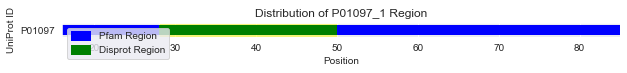

In [65]:
# Plot overlapping regions
fig, ax = plt.subplots(figsize=(10, 0.25 * len(pfam_overlap['uniprot_id'].unique())))

# Plot the regions
ax.hlines(pfam_overlap['uniprot_id'], pfam_overlap['start_pos'], pfam_overlap['end_pos'], linewidth=10, color='blue', label='Pfam Region')
ax.hlines(pfam_overlap['uniprot_id'], curated_query['start'], curated_query['end'], linewidth=10, color='green', label='Disprot Region')

ax.set_yticks(pfam_overlap['uniprot_id'])
ax.set_yticklabels(pfam_overlap['uniprot_id'])
ax.set_xlim(pfam_overlap['start_pos'].astype(int).min(), pfam_overlap['end_pos'].astype(int).max())

ax.axvspan(curated_query['start'].iloc[0], curated_query['end'].iloc[0], facecolor='yellow', alpha=0.5)

plt.title(f'Distribution of {q_id}_{i} Region')
plt.xlabel('Position')
plt.ylabel('UniProt ID')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## 3. HHblits

HHblits is used for profile-profile sequence alignment. It compares a profile against a target sequence database to find homologous sequences.

In [65]:
# Copy fasta file to remote folder
!scp {align_file} {name}@{server}:~/{q_id}_{i}.fasta

P07342_1.fasta                                100% 5573     1.3MB/s   00:00    


In [66]:
# HHblits against Pfam
!ssh {name}@{server} "/software/packages/hhsuite/hhsuite-3.0-beta.3-Linux/bin/hhblits -i {q_id}_{i}.fasta -o hhblits_pfam_{q_id}_{i}.txt -d /db/hhblits/pfamA_35.0/pfam"

- 14:49:48.950 INFO: Searching 19632 column state sequences.

- 14:49:49.053 INFO: P07342_1.fasta is in A2M, A3M or FASTA format

- 14:49:49.054 INFO: Iteration 1

- 14:49:49.070 INFO: Prefiltering database

- 14:49:49.122 INFO: HMMs passed 1st prefilter (gapless profile-profile alignment)  : 100

- 14:49:49.122 INFO: HMMs passed 2nd prefilter (gapped profile-profile alignment)   : 100

- 14:49:49.122 INFO: HMMs passed 2nd prefilter and not found in previous iterations : 100

- 14:49:49.122 INFO: Scoring 100 HMMs using HMM-HMM Viterbi alignment

- 14:49:49.159 INFO: Alternative alignment: 0

- 14:49:49.658 INFO: 100 alignments done

- 14:49:49.658 INFO: Alternative alignment: 1

- 14:49:49.660 INFO: 4 alignments done

- 14:49:49.660 INFO: Alternative alignment: 2

- 14:49:49.660 INFO: Alternative alignment: 3

- 14:49:49.679 INFO: No new hits found in iteration 1 => Stop searching

- 14:49:49.679 INFO: Realigning 12 HMM-HMM alignments using Maximum Accuracy algorithm

- 14:49:49.691 IN

In [67]:
# Copy results to the local folder
!scp {name}@{server}:~/hhblits_pfam_{q_id}_{i}.txt {local_path}/results/hmms/hhblits/

hhblits_pfam_P07342_1.txt                     100% 7224     1.2MB/s   00:00    


- `Hit`: contains information about Pfam identifier (starts with PF...), the abbreviated and full name of the domain.
- `Prob`: the probability of the match between the query sequence and the template sequence.
- `E-value`: the expected number of false positive matches that could occur by chance.
- `P-value`: the probability of obtaining a match with a score as good as or better than the observed score purely by chance.
Similar as `E-value`, the lower `P-value` indicate more significant matches.
- `Score`: the quality of the alignment between the query and template sequences.
- `SS (Secondary Structure)`: the predicted secondary structure of the aligned residues in the template sequence.
- `Cols`: the number of aligned columns or residues in the alignment between the query and template sequences.
- `Query HMM`: indicates position matches within HMM profile (input).
- `Template HMM`: indicates position matches within HMM profile (database).
Usually the length of template HMM is bigger than the length of query HMM.

In [68]:
with open(f'{local_path}/results/hmms/hhblits/hhblits_pfam_{q_id}_{i}.txt', 'r') as file:
    lines = file.readlines()

# Extract the column names
column_names = lines[8].split()[:-4] + ['Query HMM', 'Template HMM']

# Extract the data rows
data_rows = [line.split() for line in lines[9:19]]
data_rows = [[row[0]] + [' '.join(row[1:4])] + row[7:14] + [' '.join(row[14:16])]
             for row in data_rows]

hhblits_stats = pd.DataFrame(data_rows, columns=column_names)
hhblits_stats[["Hit", "Name"]] = hhblits_stats["Hit"].str.split(" ; ", expand=True)
hit_split_df = hhblits_stats["Hit"].str.split(".", expand=True)
hhblits_stats["Hit"] = hit_split_df[0]

hhblits_stats = hhblits_stats.drop("No", axis=1).reset_index(drop=True)
hhblits_stats.to_csv(f'{local_path}/results/hmms/hhblits/hhblits_pfam_{q_id}_{i}.csv', index=False)
hhblits_stats

,Hit,Prob,E-value,P-value,Score,SS,Cols,Query HMM,Template HMM,Name
0,PF11227,0.14,3E-05,24.0,0.0,11,5-15,101-111,(207),DUF3025
1,PF06523,0.35,6.4E-05,21.6,0.0,11,3-13,1-11,(91),DUF1106
2,PF10170,0.34,7.6E-05,19.4,0.0,9,8-16,64-72,(93),C6_DPF
3,PF00601,0.68,0.00012,20.7,0.0,10,1-10,2-11,(93),Flu_NS2
4,PF18386,52.5,0.73,0.00014,18.4,0.0,10,5-14,31-40 (56),ROQ_II
5,PF10045,0.94,0.0002,18.7,0.0,14,2-15,54-67,(103),DUF2280
6,PF16309,40.6,1.4,0.00029,18.3,0.0,12,2-14,47-58 (83),DUF4951
7,PF15453,30.9,2.7,0.00052,21.3,0.0,13,2-14,150-162 (328),Pilt
8,PF06789,2.6,0.00058,17.9,0.0,10,6-15,1-10,(147),MINAR1_C
9,PF04629,28.4,2.3,0.00061,17.0,0.0,9,5-13,222-230 (252),ICA69


In [69]:
# Copy again the new files to the remote computer
!scp {local_path}/results/hmms/hhblits/hhblits_pfam_{q_id}_{i}.csv {name}@{server}:~/hhblits_pfam_{q_id}_{i}.csv

hhblits_pfam_P07342_1.csv                     100%  650   133.3KB/s   00:00    


In [70]:
# !ssh {name}@{server} "/home/alina/hhblits_iterator.py hhblits_pfam_{q_id}_{i}.csv /db/interpro/protein2ipr.dat.gz pfam_uniprot_{q_id}_{i}.txt"